### CONNECTING DB AND GETTING DATA

In [4]:
poolAddress="0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"

In [2]:
import os
os.system("python update_db.py --pool_id "+poolAddress)

0

In [3]:
# !python update_db.py --pool_id poolAddress

In [5]:
import rds_config
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import traceback
import time 
from datetime import datetime
ts = int(time.time())
# DB Connection
#rds settings
rds_host  = "aws-rds-test.c2mioktk9se1.ap-south-1.rds.amazonaws.com"
name      = rds_config.db_username
password  = rds_config.db_password
db_name   = rds_config.db_name
try:
    db_data = 'mysql+pymysql://' + str(name) + ':' + str(password) + '@' + rds_host + ':3306/' \
       + str(db_name) + '?charset=utf8mb4'
    engine = create_engine(db_data)
    conn = pymysql.connect(host=rds_host, user=name, passwd=password, db=db_name, connect_timeout=60)

except pymysql.MySQLError as e:
    print("DB Not connected")
    logger.error("ERROR: Unexpected error: Could not connect to MySQL instance.")
    logger.error(e)
cur = conn.cursor()


In [6]:
start_time=int(datetime.utcfromtimestamp(ts).strptime("10-10-2021", "%d-%m-%Y").timestamp())
end_time=int(datetime.utcfromtimestamp(ts).strptime("19-12-2021", "%d-%m-%Y").timestamp())

In [7]:
start_time,end_time

(1633804200, 1639852200)

In [7]:
df_ori = pd.read_sql("SELECT * FROM {0} WHERE timestamp>{1} and timestamp<{2}".format(str(poolAddress)[1:],start_time,end_time), con=conn)

### RUNNING MODEL

/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/50
1/1 - 1s - loss: 0.5309 - val_loss: 0.8196
Epoch 2/50
1/1 - 0s - loss: 0.5137 - val_loss: 0.7883
Epoch 3/50
1/1 - 0s - loss: 0.4941 - val_loss: 0.7559
Epoch 4/50
1/1 - 0s - loss: 0.4718 - val_loss: 0.7231
Epoch 5/50
1/1 - 0s - loss: 0.4480 - val_loss: 0.6896
Epoch 6/50
1/1 - 0s - loss: 0.4218 - val_loss: 0.6554
Epoch 7/50
1/1 - 0s - loss: 0.3952 - val_loss: 0.6200
Epoch 8/50
1/1 - 0s - loss: 0.3677 - val_loss: 0.5840
Epoch 9/50
1/1 - 0s - loss: 0.3402 - val_loss: 0.5462
Epoch 10/50
1/1 - 0s - loss: 0.3139 - val_loss: 0.5065
Epoch 11/50
1/1 - 0s - loss: 0.2892 - val_loss: 0.4640
Epoch 12/50
1/1 - 0s - loss: 0.2699 - val_loss: 0.4256
Epoch 13/50
1/1 - 0s - loss: 0.2588 - val_loss: 0.3983
Epoch 14/50
1/1 - 0s - loss: 0.2534 - val_loss: 0.3831
Epoch 15/50
1/1 - 0s - loss: 0.2507 - val_loss: 0.3683
Epoch 16/50
1/1 - 0s - loss: 0.2490 - val_loss: 0.3564
Epoch 17/50
1/1 - 0s - loss: 0.2484 - val_loss: 0.3460
Epoch 18/50
1/1 - 0s - loss: 0.2453 - val_loss: 0.3341
Epoch 19/50
1/1 - 0

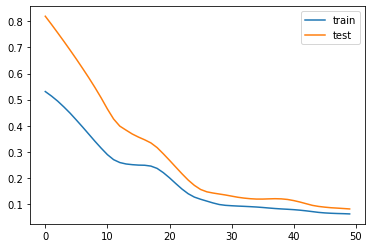

Epoch 1/75
1/1 - 1s - loss: 0.4594 - val_loss: 0.7865
Epoch 2/75
1/1 - 0s - loss: 0.4410 - val_loss: 0.7635
Epoch 3/75
1/1 - 0s - loss: 0.4211 - val_loss: 0.7398
Epoch 4/75
1/1 - 0s - loss: 0.4009 - val_loss: 0.7145
Epoch 5/75
1/1 - 0s - loss: 0.3804 - val_loss: 0.6874
Epoch 6/75
1/1 - 0s - loss: 0.3595 - val_loss: 0.6588
Epoch 7/75
1/1 - 0s - loss: 0.3392 - val_loss: 0.6288
Epoch 8/75
1/1 - 0s - loss: 0.3195 - val_loss: 0.5987
Epoch 9/75
1/1 - 0s - loss: 0.3036 - val_loss: 0.5696
Epoch 10/75
1/1 - 0s - loss: 0.2908 - val_loss: 0.5470
Epoch 11/75
1/1 - 0s - loss: 0.2787 - val_loss: 0.5329
Epoch 12/75
1/1 - 0s - loss: 0.2656 - val_loss: 0.5191
Epoch 13/75
1/1 - 0s - loss: 0.2520 - val_loss: 0.4973
Epoch 14/75
1/1 - 0s - loss: 0.2392 - val_loss: 0.4728
Epoch 15/75
1/1 - 0s - loss: 0.2253 - val_loss: 0.4473
Epoch 16/75
1/1 - 0s - loss: 0.2126 - val_loss: 0.4223
Epoch 17/75
1/1 - 0s - loss: 0.2005 - val_loss: 0.3976
Epoch 18/75
1/1 - 0s - loss: 0.1896 - val_loss: 0.3743
Epoch 19/75
1/1 - 0

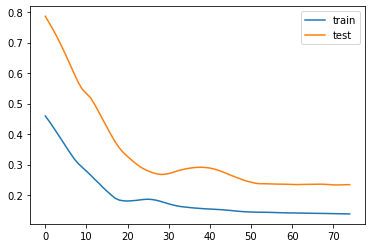

Epoch 1/75
1/1 - 1s - loss: 0.4981 - val_loss: 0.8240
Epoch 2/75
1/1 - 0s - loss: 0.4817 - val_loss: 0.8000
Epoch 3/75
1/1 - 0s - loss: 0.4677 - val_loss: 0.7795
Epoch 4/75
1/1 - 0s - loss: 0.4523 - val_loss: 0.7593
Epoch 5/75
1/1 - 0s - loss: 0.4359 - val_loss: 0.7392
Epoch 6/75
1/1 - 0s - loss: 0.4214 - val_loss: 0.7194
Epoch 7/75
1/1 - 0s - loss: 0.4075 - val_loss: 0.6994
Epoch 8/75
1/1 - 0s - loss: 0.3937 - val_loss: 0.6787
Epoch 9/75
1/1 - 0s - loss: 0.3801 - val_loss: 0.6574
Epoch 10/75
1/1 - 0s - loss: 0.3688 - val_loss: 0.6361
Epoch 11/75
1/1 - 0s - loss: 0.3599 - val_loss: 0.6145
Epoch 12/75
1/1 - 0s - loss: 0.3542 - val_loss: 0.5934
Epoch 13/75
1/1 - 0s - loss: 0.3509 - val_loss: 0.5751
Epoch 14/75
1/1 - 0s - loss: 0.3516 - val_loss: 0.5655
Epoch 15/75
1/1 - 0s - loss: 0.3540 - val_loss: 0.5608
Epoch 16/75
1/1 - 0s - loss: 0.3552 - val_loss: 0.5592
Epoch 17/75
1/1 - 0s - loss: 0.3549 - val_loss: 0.5585
Epoch 18/75
1/1 - 0s - loss: 0.3530 - val_loss: 0.5580
Epoch 19/75
1/1 - 0

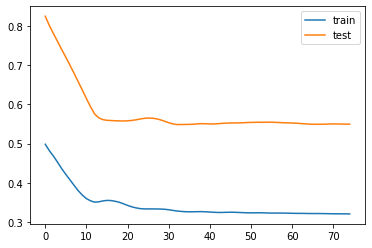

/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:349: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehun

INFO:tensorflow:Assets written to: saved_models/0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8max/assets


INFO:tensorflow:Assets written to: saved_models/0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8max/assets


INFO:tensorflow:Assets written to: saved_models/0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8min/assets


INFO:tensorflow:Assets written to: saved_models/0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8min/assets


INFO:tensorflow:Assets written to: saved_models/0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8median/assets


INFO:tensorflow:Assets written to: saved_models/0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8median/assets
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

Epoch 1/50
2/2 - 1s - loss: 0.3045 - val_loss: 0.7782
Epoch 2/50
2/2 - 0s - loss: 0.2619 - val_loss: 0.7181
Epoch 3/50
2/2 - 0s - loss: 0.2272 - val_loss: 0.6506
Epoch 4/50
2/2 - 0s - loss: 0.2007 - val_loss: 0.5821
Epoch 5/50
2/2 - 0s - loss: 0.1824 - val_loss: 0.5165
Epoch 6/50
2/2 - 0s - loss: 0.1702 - val_loss: 0.4550
Epoch 7/50
2/2 - 0s - loss: 0.1625 - val_loss: 0.3984
Epoch 8/50
2/2 - 0s - loss: 0.1585 - val_loss: 0.3489
Epoch 9/50
2/2 - 0s - loss: 0.1542 - val_loss: 0.3067
Epoch 10/50
2/2 - 0s - loss: 0.1499 - val_loss: 0.2722
Epoch 11/50
2/2 - 0s - loss: 0.1447 - val_loss: 0.2444
Epoch 12/50
2/2 - 0s - loss: 0.1381 - val_loss: 0.2222
Epoch 13/50
2/2 - 0s - loss: 0.1301 - val_loss: 0.2040
Epoch 14/50
2/2 - 0s - loss: 0.1213 - val_loss: 0.1880
Epoch 15/50
2/2 - 0s - loss: 0.1124 - val_loss: 0.1731
Epoch 16/50
2/2 - 0s - loss: 0.1039 - val_loss: 0.1578
Epoch 17/50
2/2 - 0s - loss: 0.0958 - val_loss: 0.1415
Epoch 18/50
2/2 - 0s - loss: 0.0883 - val_loss: 0.1239
Epoch 19/50
2/2 - 0

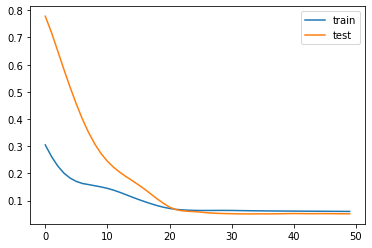

Epoch 1/75
2/2 - 1s - loss: 0.3616 - val_loss: 0.8273
Epoch 2/75
2/2 - 0s - loss: 0.3225 - val_loss: 0.7823
Epoch 3/75
2/2 - 0s - loss: 0.2886 - val_loss: 0.7331
Epoch 4/75
2/2 - 0s - loss: 0.2627 - val_loss: 0.6828
Epoch 5/75
2/2 - 0s - loss: 0.2449 - val_loss: 0.6356
Epoch 6/75
2/2 - 0s - loss: 0.2332 - val_loss: 0.5916
Epoch 7/75
2/2 - 0s - loss: 0.2253 - val_loss: 0.5526
Epoch 8/75
2/2 - 0s - loss: 0.2183 - val_loss: 0.5184
Epoch 9/75
2/2 - 0s - loss: 0.2110 - val_loss: 0.4875
Epoch 10/75
2/2 - 0s - loss: 0.2033 - val_loss: 0.4593
Epoch 11/75
2/2 - 0s - loss: 0.1955 - val_loss: 0.4336
Epoch 12/75
2/2 - 0s - loss: 0.1885 - val_loss: 0.4076
Epoch 13/75
2/2 - 0s - loss: 0.1827 - val_loss: 0.3798
Epoch 14/75
2/2 - 0s - loss: 0.1786 - val_loss: 0.3528
Epoch 15/75
2/2 - 0s - loss: 0.1754 - val_loss: 0.3305
Epoch 16/75
2/2 - 0s - loss: 0.1728 - val_loss: 0.3142
Epoch 17/75
2/2 - 0s - loss: 0.1703 - val_loss: 0.3027
Epoch 18/75
2/2 - 0s - loss: 0.1679 - val_loss: 0.2947
Epoch 19/75
2/2 - 0

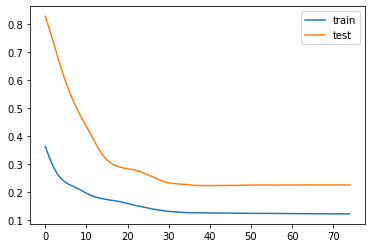

Epoch 1/75
2/2 - 1s - loss: 0.3421 - val_loss: 0.7910
Epoch 2/75
2/2 - 0s - loss: 0.3186 - val_loss: 0.7578
Epoch 3/75
2/2 - 0s - loss: 0.2985 - val_loss: 0.7241
Epoch 4/75
2/2 - 0s - loss: 0.2815 - val_loss: 0.6896
Epoch 5/75
2/2 - 0s - loss: 0.2675 - val_loss: 0.6549
Epoch 6/75
2/2 - 0s - loss: 0.2559 - val_loss: 0.6195
Epoch 7/75
2/2 - 0s - loss: 0.2472 - val_loss: 0.5843
Epoch 8/75
2/2 - 0s - loss: 0.2385 - val_loss: 0.5487
Epoch 9/75
2/2 - 0s - loss: 0.2277 - val_loss: 0.5141
Epoch 10/75
2/2 - 0s - loss: 0.2167 - val_loss: 0.4821
Epoch 11/75
2/2 - 0s - loss: 0.2078 - val_loss: 0.4560
Epoch 12/75
2/2 - 0s - loss: 0.2031 - val_loss: 0.4387
Epoch 13/75
2/2 - 0s - loss: 0.1973 - val_loss: 0.4263
Epoch 14/75
2/2 - 0s - loss: 0.1902 - val_loss: 0.4148
Epoch 15/75
2/2 - 0s - loss: 0.1824 - val_loss: 0.4023
Epoch 16/75
2/2 - 0s - loss: 0.1744 - val_loss: 0.3883
Epoch 17/75
2/2 - 0s - loss: 0.1680 - val_loss: 0.3716
Epoch 18/75
2/2 - 0s - loss: 0.1631 - val_loss: 0.3525
Epoch 19/75
2/2 - 0

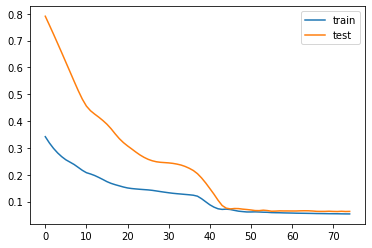

/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:349: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehunters/miniconda3/envs/credmark/lib/python3.6/site-packages/ipykernel_launcher.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/minehun

INFO:tensorflow:Assets written to: saved_models/0xcbcdf9626bc03e24f779434178a73a0b4bad62edmax/assets


INFO:tensorflow:Assets written to: saved_models/0xcbcdf9626bc03e24f779434178a73a0b4bad62edmax/assets


INFO:tensorflow:Assets written to: saved_models/0xcbcdf9626bc03e24f779434178a73a0b4bad62edmin/assets


INFO:tensorflow:Assets written to: saved_models/0xcbcdf9626bc03e24f779434178a73a0b4bad62edmin/assets


INFO:tensorflow:Assets written to: saved_models/0xcbcdf9626bc03e24f779434178a73a0b4bad62edmedian/assets


INFO:tensorflow:Assets written to: saved_models/0xcbcdf9626bc03e24f779434178a73a0b4bad62edmedian/assets


In [ ]:
import glob
import json
import pandas as pd
from datetime import datetime,timedelta
from tensorflow import keras
import tensorflow.keras.layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import traceback
import math
## TO DO  USE LSTM FOR STD_DEIVATION (PRIO)
## MAKE USE OF OTHER VARIABLES IN PREDICTING RISK PROFILES
# for filename in glob.glob("pools_curr/*"):
import os
os.makedirs("jsons",exist_ok=True)
pool_df=pd.read_csv("pools.csv")
for poolAddress in pool_df['id']:
    try:
    #     df = pd.read_csv(filename)
        df_ori = pd.read_sql("SELECT * FROM {0} WHERE timestamp>{1} and timestamp<{2}".format(str(poolAddress)[1:],start_time,end_time), con=conn)
        df=df_ori.copy()
        start_date_c=datetime.strptime("10-10-2021", "%d-%m-%Y")
        end_date_c=datetime.strptime("10-11-2021", "%d-%m-%Y")
        df=df[(df['timestamp'].apply(lambda x:int(x))>= int(start_date_c.timestamp())) & (df['timestamp'].apply(lambda x:int(x))<= int(end_date_c.timestamp()))]
        # df = df.drop('Unnamed: 0',axis=1)
        df2={}
        df2['amount1'] = df['amount1']
        df2['amountUSD'] = df['amountUSD']
        df2['id'] = df['id']
        df2['tick'] = df['tick']
        df2['sqrtPriceX96'] = df['sqrtPriceX96']
        df2['timestamp'] = df['timestamp']
        df2['liquidity'] = df['liquidity']
        df2['token1Price'] = df['token1Price']
        df2['sqrtPrice'] = df['sqrtPrice']
        df2['open'] = df['open']
        df2['close'] = df['close']
        df2['datetime'] = df['datetime']
        df2 = pd.DataFrame(df2)
        df = df.drop('amount1',axis=1)
        df = df.drop('timestamp_1',axis=1)
        df = df.drop('token1Price',axis=1)
        df = df.drop('id',axis=1)

        # df = df.drop('datetime',axis=1)
        df

        df





        sorter = df.iloc[[0]]
        inputmax={}
        intputmin={}
        inputmedian={}
        count = 1
        sorter = pd.DataFrame(sorter)
        inputmax = pd.DataFrame(columns = df.columns)
        inputmin = pd.DataFrame(columns = df.columns)
        inputmedian = pd.DataFrame(columns = df.columns)

        for i in range(1,df.shape[0]):
    #         temp1 =  datetime. strptime(df['datetime'][i-1], '%Y-%m-%d %H:%M:%S')
            temp1=df['datetime'][i-1]
        #     temp1=temp1[:-3]
            stamp1 = datetime.timestamp(temp1)
            temp1 = datetime.date(temp1)

        #     print(temp1)
    #         temp2 =  datetime. strptime(df['datetime'][i], '%Y-%m-%d %H:%M:%S')
            temp2=df['datetime'][i]
            stamp2 = datetime.timestamp(temp2)
            temp2 = datetime.date(temp2)

        #     temp2 = datetime.date(temp2)
            if(temp1==temp2 and abs(stamp1-stamp2) < 3600):
                sorter=sorter.append(df.iloc[[i]],ignore_index = True)
            else:
                inputmax = inputmax.append(sorter.iloc[sorter[['token0Price']].idxmax()],ignore_index=True)
                inputmin = inputmin.append(sorter.iloc[sorter[['token0Price']].idxmin()],ignore_index=True)
                inputmedian = inputmedian.append(sorter.iloc[(sorter['token0Price']-sorter['token0Price'].median()).abs().argsort()[:1]],ignore_index=True)
                sorter = pd.DataFrame(columns = sorter.columns)
                sorter=sorter.append(df.iloc[[i]],ignore_index = True)

        inputmax.shape, inputmin.shape




        def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
            n_vars = 1 if type(data) is list else data.shape[1]
            dff = pd.DataFrame(data)
            cols, names = list(), list()
            # input sequence (t-n, ... t-1)
            for i in range(n_in, 0, -1):
                cols.append(dff.shift(i))
                names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
            # forecast sequence (t, t+1, ... t+n)
            for i in range(0, n_out):
        #         print("DEBUG ", dff.shift(-i))
                cols.append(dff.shift(-i))
                if i == 0:
                    names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
                else:
                    names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            # put it all together
            agg = pd.concat(cols, axis=1)
            agg.columns = names
    #             print(agg)
            agg=agg[:-5]
            agg=agg.ffill()
            # drop rows with NaN values
            if dropnan:
                agg.dropna(inplace=True)
            return agg

        for i in range(inputmax.shape[0]):
    #         temp =  datetime.strptime(inputmax['datetime'][i], '%Y-%m-%d %H:%M:%S')
            temp=inputmax['datetime'][i]
            inputmax['datetime'][i]=datetime.timestamp(temp)
        for i in range(inputmin.shape[0]):
    #         temp =  datetime. strptime(inputmin['datetime'][i], '%Y-%m-%d %H:%M:%S')
            temp=inputmin['datetime'][i]
            inputmin['datetime'][i]=datetime.timestamp(temp)
        for i in range(inputmedian.shape[0]):        
    #         temp =  datetime. strptime(inputmedian['datetime'][i], '%Y-%m-%d %H:%M:%S')
            temp=inputmedian['datetime'][i]
            inputmedian['datetime'][i]=datetime.timestamp(temp)

        meanmax = inputmax['token0Price'].mean()
        standardDeviationmax = inputmax['token0Price'].std()

        meanmin = inputmin['token0Price'].mean()
        standardDeviationmin = inputmin['token0Price'].std()

        meanmedian = inputmedian['token0Price'].mean()
        standardDeviationmedian = inputmedian['token0Price'].std()

        valuesmax = inputmax.values
        valuesmax = valuesmax.astype('float32')

        valuesmin = inputmin.values
        valuesmin = valuesmin.astype('float32')

        valuesmedian = inputmedian.values
        valuesmedian = valuesmedian.astype('float32')
        # normalize features

        scaler1 = MinMaxScaler(feature_range=(0, 1))
        scaler2 = MinMaxScaler(feature_range=(0, 1))
        scaler3 = MinMaxScaler(feature_range=(0, 1))

        scaledmax = scaler1.fit_transform(inputmax)
        scaledmin = scaler2.fit_transform(inputmin)
        scaledmedian = scaler3.fit_transform(inputmedian)

        # frame as supervised learning
        inputformax=pd.DataFrame(scaledmax,columns = df.columns)
        reframedmax = series_to_supervised(inputformax['token0Price'].values.reshape(inputformax['token0Price'].shape[0],1), 0, 11)

        inputformin=pd.DataFrame(scaledmin,columns = df.columns)
        reframedmin = series_to_supervised(inputformin['token0Price'].values.reshape(inputformin['token0Price'].shape[0],1), 0, 11)

        inputformedian=pd.DataFrame(scaledmedian,columns = df.columns)
        reframedmedian = series_to_supervised(inputformedian['token0Price'].values.reshape(inputformedian['token0Price'].shape[0],1), 0, 11)

        inputformax.shape







        inputformax = series_to_supervised(inputformax,0,6)
        inputformedian = series_to_supervised(inputformedian,0,6)
        inputformin = series_to_supervised(inputformin,0,6)

        inputformedian

        inputformax['predict1']=reframedmax['var1(t+6)']
        inputformax['predict2']=reframedmax['var1(t+7)']
        inputformax['predict3']=reframedmax['var1(t+8)']
        inputformax['predict4']=reframedmax['var1(t+9)']
        inputformax['predict5']=reframedmax['var1(t+10)']

        inputformax=inputformax.dropna()

        inputformin['predict1']=reframedmin['var1(t+6)']
        inputformin['predict2']=reframedmin['var1(t+7)']
        inputformin['predict3']=reframedmin['var1(t+8)']
        inputformin['predict4']=reframedmin['var1(t+9)']
        inputformin['predict5']=reframedmin['var1(t+10)']
        inputformin=inputformin.dropna()

        inputformedian['predict1']=reframedmedian['var1(t+6)']
        inputformedian['predict2']=reframedmedian['var1(t+7)']
        inputformedian['predict3']=reframedmedian['var1(t+8)']
        inputformedian['predict4']=reframedmedian['var1(t+9)']
        inputformedian['predict5']=reframedmedian['var1(t+10)']
        inputformedian=inputformedian.dropna()



        reframedmedian

        inputformedian









        from tensorflow import keras
        from tensorflow.keras.models import Sequential
        from tensorflow.keras.layers import Dense
        from tensorflow.keras.layers import LSTM
        from matplotlib import pyplot

        valuesmax = inputformax.values
        n_trainmax = int(inputformax.shape[0]*0.66)
        train = valuesmax[:n_trainmax, :]
        test = valuesmax[n_trainmax:, :]

        # split into input and outputs
        train_X, train_y = train[:, :-5], train[:, -5:]
        test_X, test_y = test[:, :-5], test[:, -5:]
        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

        model1 = Sequential()
        model1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        model1.add(Dense(10,activation = 'relu'))
        model1.add(Dense(5,activation = 'relu'))
        model1.compile(loss='mae', optimizer='adam')
        # fit network
        history = model1.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
        # plot history
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        pyplot.show()





        # design network
        valuesmin = inputformin.values
        n_trainmin = int(inputformin.shape[0]*0.66)
        train = valuesmin[:n_trainmin, :]
        test = valuesmin[n_trainmin:, :]

        # split into input and outputs
        train_X, train_y = train[:, :-5], train[:, -5:]
        test_X, test_y = test[:, :-5], test[:, -5:]
        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

        model2 = Sequential()
        model2.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        model2.add(Dense(10,activation = 'relu'))
        model2.add(Dense(5,activation = 'relu'))
        model2.compile(loss='mae', optimizer='adam')
        # fit network
        history = model2.fit(train_X, train_y, epochs=75, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
        # plot history
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        pyplot.show()


        # design network
        valuesmedian = inputformedian.values
        n_trainmedian = int(inputformedian.shape[0]*0.66)
        train = valuesmedian[:n_trainmedian, :]
        test = valuesmin[n_trainmedian:, :]

        # split into input and outputs
        train_X, train_y = train[:, :-5], train[:, -5:]
        test_X, test_y = test[:, :-5], test[:, -5:]
        # reshape input to be 3D [samples, timesteps, features]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

        model3 = Sequential()
        model3.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
        model3.add(Dense(10,activation = 'relu'))
        model3.add(Dense(5,activation = 'relu'))
        model3.compile(loss='mae', optimizer='adam')
        # fit network
        history = model3.fit(train_X, train_y, epochs=75, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
        # plot history
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        pyplot.show()


        def convertinputformodel(test,scaler1,scaler2,scaler3):
            test = test.drop('amount1',axis=1)
            test = test.drop('timestamp_1',axis=1)
            test = test.drop('token1Price',axis=1)
            test = test.drop('id',axis=1)
        #     test = test.drop('Unnamed: 0',axis=1)
            sortered = pd.DataFrame(columns=test.columns)
            test1 = pd.DataFrame(columns=test.columns)
            test2 = pd.DataFrame(columns=test.columns)
            test3 = pd.DataFrame(columns=test.columns)
            datetime1=pd.DataFrame(columns={'date'})
            datetime2=pd.DataFrame(columns={'date'})
            datetime3=pd.DataFrame(columns={'date'})
            for i in range(1,(test.shape[0]-1)):
    #             temp1 =  datetime. strptime(test['datetime'][i-1], '%Y-%m-%d %H:%M:%S')
                temp1= test['datetime'][i-1]
            #     temp1=temp1[:-3]
                stamp1 = datetime.timestamp(temp1)
                temp1 = datetime.date(temp1)
            #     print(temp1)
    #             temp2 =  datetime. strptime(test['datetime'][i], '%Y-%m-%d %H:%M:%S')
                temp2 = test['datetime'][i]
                stamp2 = datetime.timestamp(temp2)
                temp2 = datetime.date(temp2)
            #     temp2 = datetime.date(temp2)
                if(temp1==temp2 and abs(stamp1-stamp2) < 3600):
                    sortered=sortered.append(test.iloc[[i]],ignore_index = True)
                else:
                    if len(sortered)==0:
                        continue
                    test1 = test1.append(sortered.iloc[sortered[['token0Price']].idxmax()],ignore_index=True)
                    test2 = test2.append(sortered.iloc[sortered[['token0Price']].idxmin()],ignore_index=True)
                    test3 = test3.append(sortered.iloc[(sortered['token0Price']-sortered['token0Price'].median()).abs().argsort()[:1]],ignore_index=True)
                    sortered = pd.DataFrame(columns = sortered.columns)
                    sortered=sortered.append(test.iloc[[i]],ignore_index = True)
            for i in range(test1.shape[0]):
    #             temp =  datetime.strptime(test1['datetime'][i], '%Y-%m-%d %H:%M:%S')
                temp = test1['datetime'][i]
                test1['datetime'][i]=datetime.timestamp(temp)
                datetime1 = datetime1.append({'date':temp.strftime('%Y-%m-%d %H')},ignore_index=True)
            for i in range(test2.shape[0]):
    #             temp =  datetime. strptime(test2['datetime'][i], '%Y-%m-%d %H:%M:%S')
                temp = test2['datetime'][i]
                test2['datetime'][i]=datetime.timestamp(temp)
                datetime2 = datetime2.append({'date':temp.strftime('%Y-%m-%d %H')},ignore_index=True)
            for i in range(test3.shape[0]):        
    #             temp =  datetime. strptime(test3['datetime'][i], '%Y-%m-%d %H:%M:%S')
                temp = test3['datetime'][i]
                test3['datetime'][i]=datetime.timestamp(temp)
                datetime3 = datetime3.append({'date':temp.strftime('%Y-%m-%d %H')},ignore_index=True)
            test1 = scaler1.transform(test1)
            test2 = scaler2.transform(test2)
            test3 = scaler3.transform(test3)
    #             print(test1.shape,"---------------------------")
            test1 = series_to_supervised(test1,0,6)
    #             print(test1.shape,"#########################")
            test2 = series_to_supervised(test2,0,6)
            test3 = series_to_supervised(test3,0,6)

            return test1,test2,test3,datetime1,datetime2,datetime3


        # ymax.shape,test.shape,datetime1.shape

    #         y1.shape


    #         ymax=np.zeros((y1.shape[0]+y1.shape[1]-1,))
    #         print(ymax.shape)

    #     test = pd.read_csv(filename)
        test=df_ori.copy()
        start_date_c=datetime.strptime("11-10-2021", "%d-%m-%Y")
        end_date_c=datetime.strptime("24-11-2021", "%d-%m-%Y")
        test=test[(test['timestamp'].apply(lambda x:int(x))>= int(start_date_c.timestamp())) & (test['timestamp'].apply(lambda x:int(x))<= int(end_date_c.timestamp()))].reset_index(drop=True)
    #         print("---------------TEST----------------")
    #         print(test)
        test1,test2,test3,datetime1,datetime2,datetime3=convertinputformodel(test,scaler1,scaler2,scaler3)
    #         print(test1.shape,datetime1.shape)
        y1 = model1.predict(test1.values.reshape(test1.shape[0],1,test1.shape[1]))
        y1 = (y1*standardDeviationmax)+meanmax
        y2 = model2.predict(test2.values.reshape(test2.shape[0],1,test2.shape[1]))
        y2 = (y2*standardDeviationmin)+meanmin
        y3 = model3.predict(test3.values.reshape(test3.shape[0],1,test3.shape[1]))
        y3 = (y3*standardDeviationmedian)+meanmedian
    #         print(datetime1)


        
        ymax=np.zeros((y1.shape[0]+y1.shape[1],))
    #         print(ymax.shape)
        count=0
        index=0
        for i in range(0,y1.shape[0]+y1.shape[1]):
            for j in range(0,y1.shape[1]):
                for k in range(0,y1.shape[0]):
                    if(j+k==i):
                        ymax[index]=ymax[index]+y1[k][j]
                        count=count+1
            ymax[index]=ymax[index]/count
            count=0
            index=index+1

        ymax[-1]=y1[-1][-1]


        ymin=np.zeros((y2.shape[0]+y2.shape[1],))
        count=0
        index=0
        for i in range(0,y2.shape[0]+y2.shape[1]):
            for j in range(0,y2.shape[1]):
                for k in range(0,y2.shape[0]):
                    if(j+k==i):
                        ymin[index]=ymin[index]+y2[k][j]
                        count=count+1
            ymin[index]=ymin[index]/count
            count=0
            index=index+1
        ymin[-1]=y2[-1][-1]





        ymedian=np.zeros((y3.shape[0]+y3.shape[1],))
        count=0
        index=0
        for i in range(0,y3.shape[0]+y3.shape[1]):
            for j in range(0,y3.shape[1]):
                for k in range(0,y3.shape[0]):
                    if(j+k==i):
                        ymedian[index]=ymedian[index]+y3[k][j]
                        count=count+1
            ymedian[index]=ymedian[index]/count
            count=0
            index=index+1
        ymedian[-1]=y3[-1][-1]
    #     print(ymax)

        ymin

        positionslow=pd.DataFrame(columns={'open','close'})
        positionslow['open']=ymin
        positionslow['close']=ymax
        positionslow=positionslow.dropna()
    #         print(datetime1.shape[0])
        datesfinal=set()
        for i in range(datetime1.shape[0]):
            d=datetime.strptime(datetime1['date'][i],'%Y-%m-%d %H')
        #     d=d.date()
        #     for j in range(0,5):
        #         d=d+timedelta(hours=1)
            datesfinal.add(d.strftime('%Y-%m-%d %H'))
        datesfinal=sorted(datesfinal)
    #         print(len(datesfinal))
        for i in range(positionslow.shape[0]):
            a=positionslow['open'][i]
            b=positionslow['close'][i]
            if(a>b):
                tickmedian = math.floor(np.log(math.sqrt(ymedian[i]))/np.log(math.sqrt(1.0001)))
                positionslow['open'][i] = pow(1.0001,tickmedian-100)
                positionslow['close'][i] = pow(1.0001,tickmedian+100)
        positionslow['date']=datesfinal
        # positionslow['date']='nan'
        # print(len(datesfinal),len(positionslow['date'][5:])) 
        # positionslow['date'][5:]=datesfinal
    #         print(positionslow)



        len(datesfinal),len(positionslow)

        datesfinal

        # open =  lower
        # close = upper

        standardDeviationmax

        standardDeviationmin

        standardDeviationmedian



        test = pd.DataFrame(positionslow)

        test.head()

        standardDeviationmax, standardDeviationmedian, standardDeviationmin

        test['low_open'] = test['open']    - 2*standardDeviationmax 
        test['low_close'] = test['close']  + 2*standardDeviationmax   
        test['medium_open'] = test['open']    - 1.5*standardDeviationmedian #/ 2
        test['medium_close'] = test['close']  + 1.5*standardDeviationmedian #/2 
        test['high_open'] = test['open']   - standardDeviationmin    #/ 2
        test['high_close'] = test['close'] + standardDeviationmin    #/ 2

        test.head()

    #     gt = pd.read_csv(filename)
        gt=df_ori.copy()
        start_date_c=datetime.strptime("11-10-2021", "%d-%m-%Y")
        end_date_c=datetime.strptime("24-11-2021", "%d-%m-%Y")
        gt=gt[(gt['timestamp'].apply(lambda x:int(x))>= int(start_date_c.timestamp())) & (gt['timestamp'].apply(lambda x:int(x))<= int(end_date_c.timestamp()))].reset_index(drop=True)
        gt = gt[['datetime','token0Price','timestamp']]


        gt

        result={}
        result['positions']={}

        c=0
        profiles = ['low', 'medium', 'high']
        std=[standardDeviationmax,standardDeviationmedian,standardDeviationmin]
        pows=[2,1.5,1]
        result['withdraw']=[]
        withdraw=False
        for ind in range(len(profiles)):
        #     print(profile)
            profile=profiles[ind]
            result['positions'][profile]={}


            CURRENT_LOW = test.loc[0, profile+'_open']
            CURRENT_HIGH = test.loc[0, profile+'_close']
            result['positions'][profile]['date']=[gt['datetime'][0].strftime('%Y-%m-%d %H:%M:%S')]
            result['positions'][profile]['positionPriceLower']=[CURRENT_LOW]
            result['positions'][profile]['positionPriceUpper']=[CURRENT_HIGH]

        #     print(CURRENT_HIGH - CURRENT_LOW, CURRENT_HIGH, CURRENT_LOW )
            current_time=gt['timestamp'][0]
            try:
                for i in range(1,len(gt)):
                    if gt['timestamp'][i]<(current_time+24*7*3600):
                        continue
                    else:
                        current_time=gt['timestamp'][i]

                    if gt['token0Price'][i] > CURRENT_HIGH or gt['token0Price'][i] < CURRENT_LOW:
                        print("needs reblancing")
                        date=gt['datetime'][i][:-6]
                        CURRENT_LOW=test[profile+"_open"][(test['date']==date).argmax()]
                        CURRENT_HIGH=test[profile+"_close"][(test['date']==date).argmax()]
                        if gt['token0Price'][i] > CURRENT_HIGH or gt['token0Price'][i] < CURRENT_LOW:
                            print(CURRENT_HIGH,std[ind],CURRENT_LOW,gt['token0Price'][i],"---------------------------------")
                            if ind==0 and CURRENT_HIGH+std[ind]*2<gt['token0Price'][i]:
                                withdraw=True
                            if ind==0 and CURRENT_LOW-std[ind]*2>gt['token0Price'][i]:
                                withdraw=True
                            CURRENT_HIGH = gt['token0Price'][i]+std[ind]*pows[ind]
                            CURRENT_LOW = gt['token0Price'][i]-std[ind]*pows[ind]
                        if withdraw:
                            result['withdraw'].append(gt['datetime'][i].strftime('%Y-%m-%d %H:%M:%S'))
                        result['positions'][profile]['date'].append(gt['datetime'][i].strftime('%Y-%m-%d %H:%M:%S'))
                        result['positions'][profile]['positionPriceUpper'].append(CURRENT_HIGH)
                        result['positions'][profile]['positionPriceLower'].append(CURRENT_LOW)
                        if withdraw:
                            break

                    else:
                        pass

            except:
                pass
        pool_id=poolAddress
        model1.save("saved_models/"+str(pool_id)+"max")
        model2.save("saved_models/"+str(pool_id)+"min")
        model3.save("saved_models/"+str(pool_id)+"median")
        with open("jsons/"+pool_id+".json", "w") as outfile:
            json.dump(result, outfile,indent=4)
    except Exception as e:
        print("NOT ENOUGH DATA")
    #     print(traceback.format_exc())
    #         break

In [1]:
!mkdir saved_models

In [9]:
result

{'positions': {'low': {'date': ['2021-10-11 00:24:07'],
   'positionPriceLower': [3418.1594041595454],
   'positionPriceUpper': [5009.350361465455]},
  'medium': {'date': ['2021-10-11 00:24:07'],
   'positionPriceLower': [3601.8746959464897],
   'positionPriceUpper': [4825.63506967851]},
  'high': {'date': ['2021-10-11 00:24:07'],
   'positionPriceLower': [3778.7778500464115],
   'positionPriceUpper': [4648.731915578589]}},
 'withdraw': []}

### TO DOs
#### PERFORMANCE
###### USE COINGEKO API IN APR CALCULATIONS (TO BE DONE)
###### USE COIN GEKO TO API AND INTEGRATE APR IN LOSS  (TO BE DONE)

##### DEPLOYMENT
###### DEPLOY EACH LSTM AND MAKE A METHOD TO TRAIN THEM WEEKLY (IN PROGESS)


### DONE 
###### DUMPED LSTMS
###### RDS SYNC WITH LSTMS

###### ADDED PARAMETER FOR WITHDRAW POSITIONS

###### ADDED MORE ONE MORE LAYER IN LSTM (ADDING MORE IS DECREASING PERFORMANCE)
